<a href="https://colab.research.google.com/github/rdthemis/ADTD/blob/main/Trabalho%20Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Trabalho final - Análise de Dados e Tomada de Decisões 2023 -
Desafio -
O naufrágio do RMS Titanic -
Colediu com um iceberg em 15 de abril de 1912 -
resultando na morte de 1502 dos 2224 passageiros e tripulantes.

1° etapa
Análise Exploratória e Visualização de Dados

importação das bibliotecas

In [57]:
import pandas as pd
from pandas.io.formats.format import math
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import scipy.stats as stats

importação dos dados para dataset com as informações do RMS Titanic

In [22]:
titanic = pd.read_csv('/content/drive/MyDrive/train.csv')

Exibindo informações sobre os dados

In [23]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Realizando leitura do dataset por padrão será exibido 5 linhas mas podemos informar qualquer quantidade.

In [24]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Função describe

In [25]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Verifica-se que existe id's de passageiros sem informação de qual cabine ele estava, iremos verificar se existe algum NUll também.

In [26]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Vamos tratar essas informações, excluir não é uma opção pois perderiamos detalhes inportantee spara nossa análise futuramente. Então vamos preencher esses campos com alguma informação, sendo de acordo com o contexto para não mascarar os dados.

Primeiro 177 id's com idade sem informação, neste caso uma solução séria pegar a média das idades de todos os passageiros e substituir os nulos.

In [27]:
idadeMedia = titanic['Age'].mean()
idadeMedia

29.69911764705882

substituindo a idade

In [28]:
titanic.update(titanic['Age'].fillna((math.floor(idadeMedia))))

Foi utilizado o math da biblioteca Pandas para arredondar a idade.
Iremos ferificar se a alterar foi feita com sucesso.

In [29]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Iremos tratar as cabines sem informação, uma solução simples que ao olhar identificamos qual a informação contida é substituir NaN por Cabine Não Cadastrada.

In [30]:
titanic.update(titanic['Cabin'].fillna('Não Cad'))
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [31]:
emb = titanic.loc[titanic['Embarked'].isnull()]
emb['Embarked']

61     NaN
829    NaN
Name: Embarked, dtype: object

Iremos tratar está informação de Embarked comNão Informado

In [32]:
titanic.update(titanic['Embarked'].fillna(('Não Inf')))
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

A função describe, apresenta para ánalise valores como a média, mínima e máxima sobre todas as colunas utilizando o describe transpose que uma matrix transposta da tabela do titanic.  

In [33]:
titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,891.0,29.560236,13.005010,0.42,22.0000,29.0000,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


outliers

<Axes: xlabel='Pclass', ylabel='Fare'>

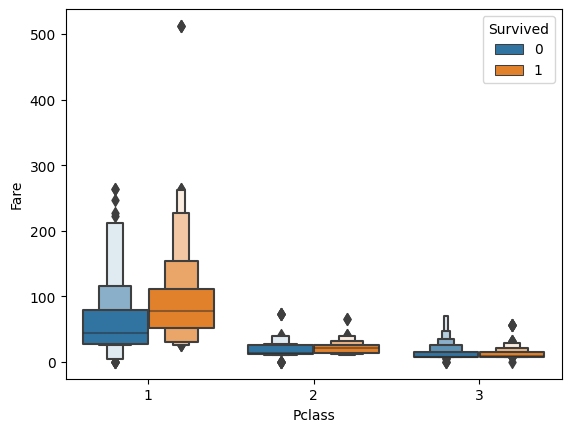

In [34]:
sns.boxenplot(data=titanic, x="Pclass", y="Fare", hue="Survived")

Descrição das características dos tripulantes do titanic
Idade

In [35]:
titanic['Age'].describe()

count    891.000000
mean      29.560236
std       13.005010
min        0.420000
25%       22.000000
50%       29.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

Sexo

Total de Homens e mulheres embarcados

In [36]:
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

Comparar tipo de sexo com os sobreviventes, verifica-se que a maior taxa de sobrevivência foi do sexo feminino.

<Axes: xlabel='Sex', ylabel='Survived'>

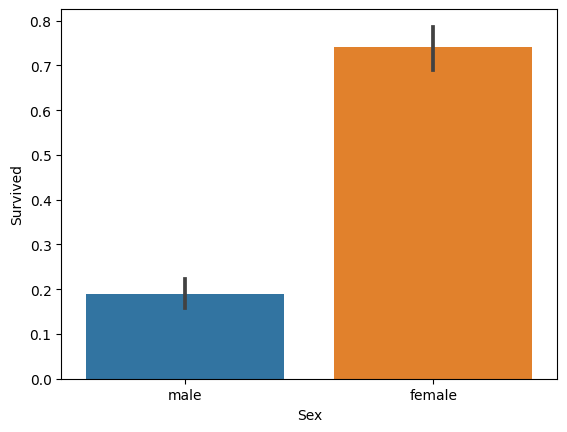

In [37]:
sns.barplot(x='Sex', y='Survived', data=titanic)

Taxa de sobreviventes por classe, onde verifica-se que as classes mais altas tiveram maior taxa de sobrevivência.

<Axes: xlabel='Pclass', ylabel='Survived'>

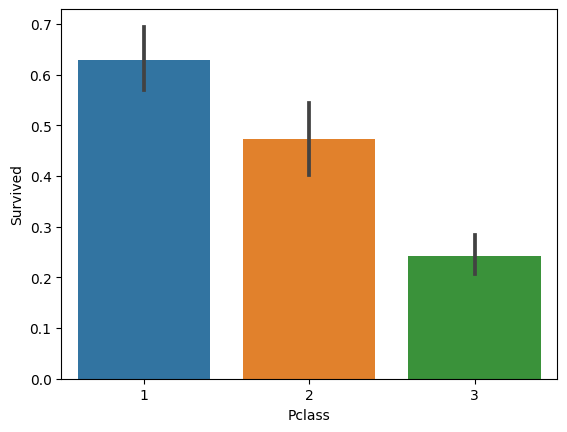

In [38]:
sns.barplot(data=titanic, x='Pclass', y='Survived' )

Vamos analisar taxa de sobreviventes por idade, mas antes vamos tratar os dados, dividindo as idades por faixa etária para simplificar o gráfico e melhor o resultado da ánalise.

In [39]:
conditions = [
    (titanic['Age'] <= 18.0),
    (titanic['Age'] <= 35.0),
    (titanic['Age'] > 35.0)]
choices = [0,1,2]
titanic['F.Etaria'] = np.select(conditions, choices, default='black')
titanic['F.Etaria'] = titanic['F.Etaria'].astype('float64')

No gráfico verifica-se que a faixa etária de 18 a 35 anos foram os que tiveram maior taxa de não sobreviventes e também maior taxa de sobreviventes, uma interpretação que o maior número de pessoas a bordo estava nesta faixa etária.

<Axes: xlabel='Survived', ylabel='count'>

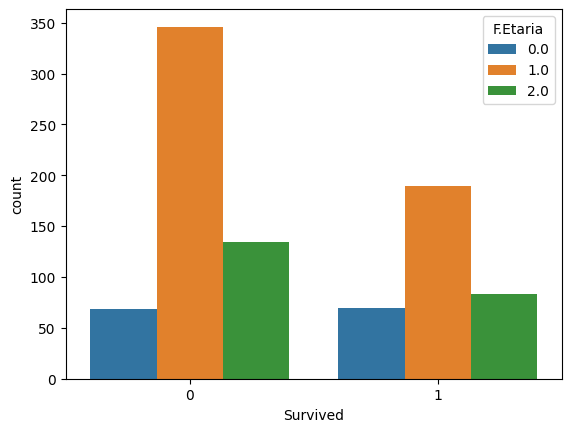

In [40]:
sns.countplot(data=titanic, x='Survived', hue='F.Etaria')

Compração das tarifas pagas entre cada classe.

<Axes: xlabel='Pclass', ylabel='Fare'>

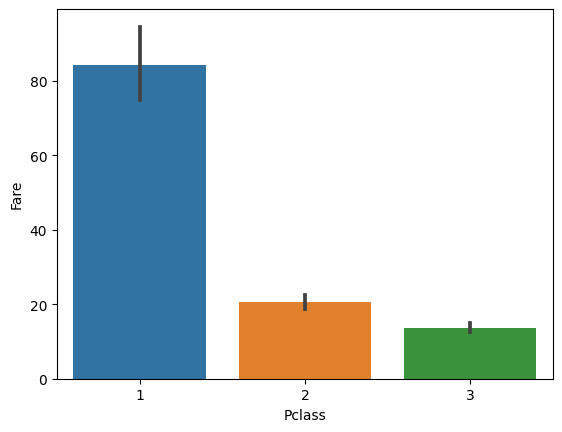

In [41]:
sns.barplot(data=titanic, x='Pclass', y='Fare')

correlação entre os dados

In [42]:
correlacao = titanic.corr()
correlacao

<ipython-input-42-8a9cfe78a4e0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao = titanic.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,F.Etaria
PassengerId,1.000000,-0.005007,-0.035144,0.033632,-0.057527,-0.001652,0.012658,0.019099
Survived,-0.005007,1.000000,-0.338481,-0.067814,-0.035322,0.081629,0.257307,-0.062448
Pclass,-0.035144,-0.338481,1.000000,-0.334974,0.083081,0.018443,-0.549500,-0.306975
Age,0.033632,-0.067814,-0.334974,1.000000,-0.232978,-0.176486,0.093706,0.882665
SibSp,-0.057527,-0.035322,0.083081,-0.232978,1.000000,0.414838,0.159651,-0.229032
Parch,-0.001652,0.081629,0.018443,-0.176486,0.414838,1.000000,0.216225,-0.130778
Fare,0.012658,0.257307,-0.549500,0.093706,0.159651,0.216225,1.000000,0.090653
F.Etaria,0.019099,-0.062448,-0.306975,0.882665,-0.229032,-0.130778,0.090653,1.000000


<Axes: >

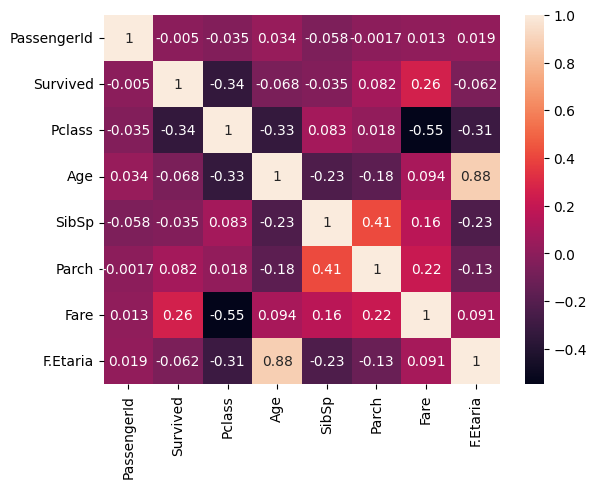

In [43]:
sns.heatmap(correlacao, annot=True)

Amostragem e probabilidade

In [44]:
amostra = titanic.sample(n=50, random_state=42, replace=False)
amostra.shape

(50, 13)

In [45]:
y = titanic['Survived']
X = titanic.drop(columns=['Survived'])

In [46]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Survived
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


In [48]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        891 non-null    object 
 10  Embarked     891 non-null    object 
 11  F.Etaria     891 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 83.7+ KB


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<Axes: xlabel='Sex', ylabel='count'>

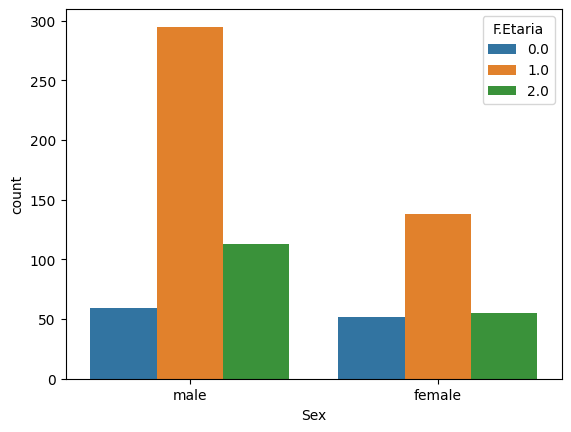

In [50]:
sns.countplot(data=X_train, x='Sex', hue='F.Etaria')

<Axes: xlabel='Pclass', ylabel='count'>

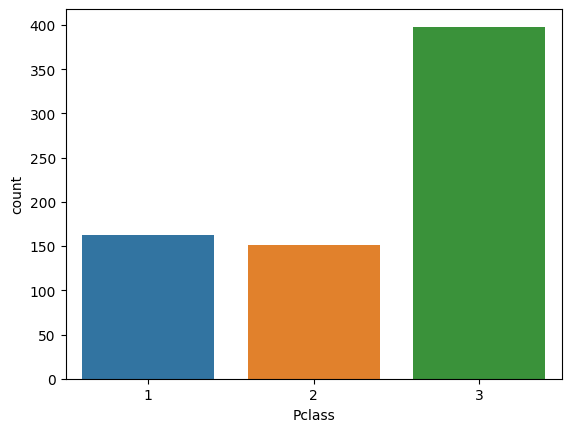

In [56]:
sns.countplot(data=X_train, x='Pclass')

Probabilidade

In [51]:
E_Amostral = len(titanic)

In [52]:
mediaIdade = titanic.loc[titanic['Age'] > 18]
evento = len(mediaIdade)

In [53]:
print(evento / E_Amostral)

0.8439955106621774


Distribuição

<Axes: xlabel='Survived', ylabel='Density'>

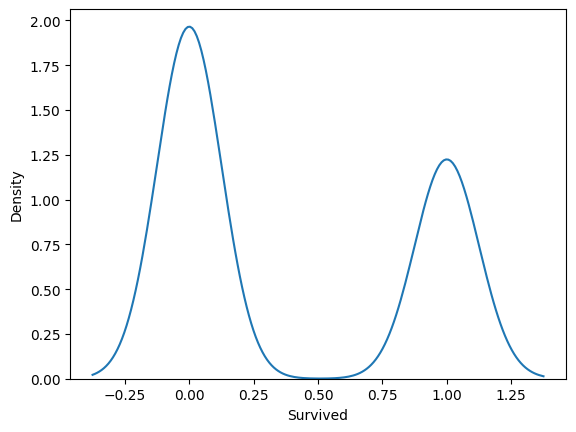

In [58]:
sns.kdeplot(titanic['Survived'])

Regressão Linear